Importing the dependancies.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

Data Collection and analysis

PIMA diabetes dataset

In [ ]:
#Loading the dataset to a pandas Dataframe
diabetes_dataset = pd.read_csv('/content/diabetes.csv')

In [ ]:
pd.read_csv

<function pandas.io.parsers.readers.read_csv(filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]', *, sep: 'str | None | lib.NoDefault' = <no_default>, delimiter: 'str | None | lib.NoDefault' = None, header: "int | Sequence[int] | None | Literal['infer']" = 'infer', names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>, index_col: 'IndexLabel | Literal[False] | None' = None, usecols=None, squeeze: 'bool | None' = None, prefix: 'str | lib.NoDefault' = <no_default>, mangle_dupe_cols: 'bool' = True, dtype: 'DtypeArg | None' = None, engine: 'CSVEngine | None' = None, converters=None, true_values=None, false_values=None, skipinitialspace: 'bool' = False, skiprows=None, skipfooter: 'int' = 0, nrows: 'int | None' = None, na_values=None, keep_default_na: 'bool' = True, na_filter: 'bool' = True, verbose: 'bool' = False, skip_blank_lines: 'bool' = True, parse_dates=None, infer_datetime_format: 'bool' = False, keep_date_col: 'bool' = False, date_parser=None, dayf

# DATA PREPROCESSING

In [ ]:
# printing first five rows of dataset
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# number of rows and columns in dataset
diabetes_dataset.shape

(768, 9)

In [ ]:
# printing the statistical measures of the dat a
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
diabetes_dataset.isnull().sum() # Thus there are no null values in a data set

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
diabetes_dataset.dtypes # To find the data type of each column

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
diabetes_dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

0 --> Non diabetic
1 --> people who are diabetic

In [ ]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


# EXPLORATORY DATA ANALYSIS

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

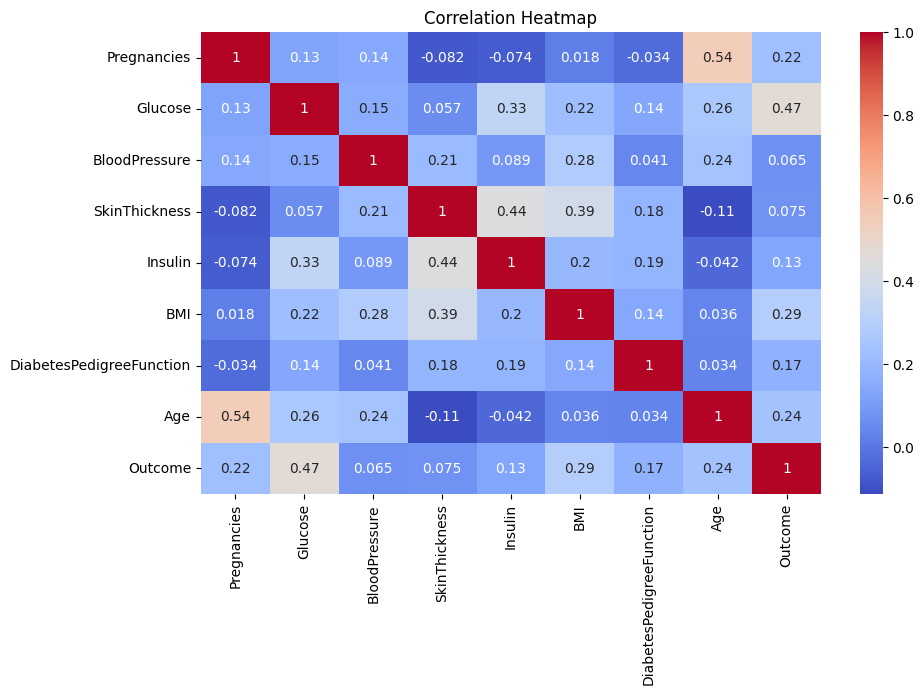

In [ ]:
# Correlation heatmap
correlation_matrix = diabetes_dataset.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

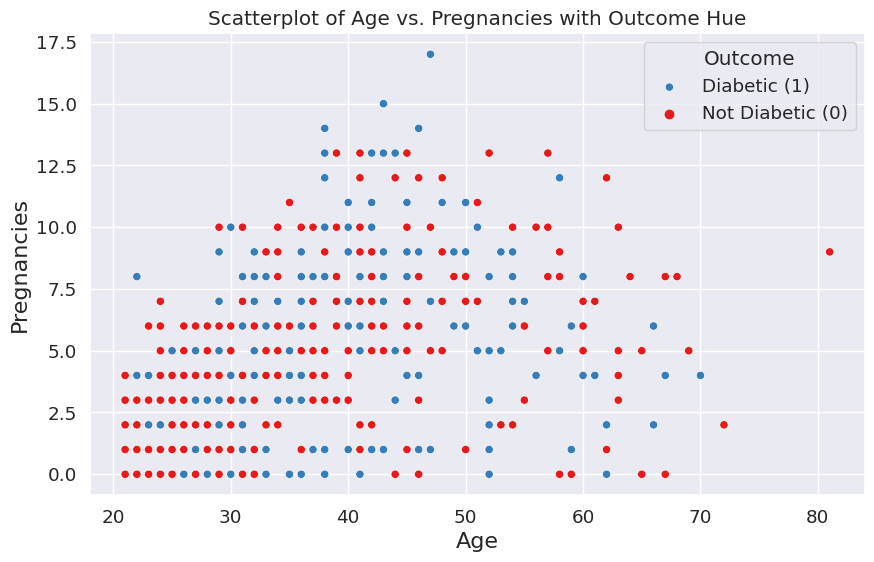

In [ ]:
# Set the font scale to make the labels larger
sns.set(font_scale=1.2)

# Create a scatterplot with 'Age' on the x-axis, 'Pregnancies' on the y-axis, and 'Outcome' as the hue
plt.figure(figsize=(10, 6))
sns.scatterplot(data=diabetes_dataset, x='Age', y='Pregnancies', hue='Outcome', palette='Set1')
plt.title('Scatterplot of Age vs. Pregnancies with Outcome Hue')
plt.xlabel('Age', fontsize=16)  # Set a larger font size for the x-axis label
plt.ylabel('Pregnancies', fontsize=16)  # Set a larger font size for the y-axis label
plt.legend(title='Outcome', labels=['Diabetic (1)', 'Not Diabetic (0)'])
plt.show()

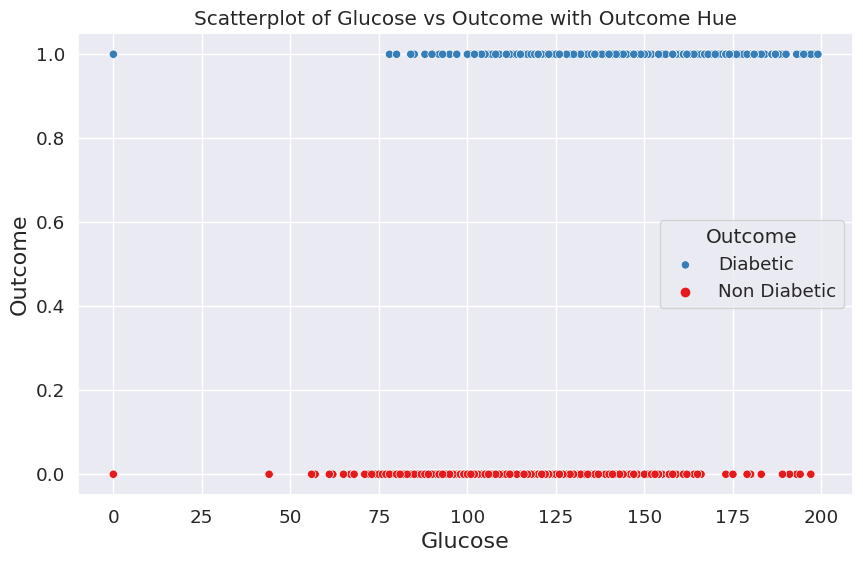

In [ ]:
# Set the font scale to make the labels larger
sns.set(font_scale=1.2)

# Create a scatterplot with 'Age' on the x-axis, 'Pregnancies' on the y-axis, and 'Outcome' as the hue
plt.figure(figsize=(10, 6))
sns.scatterplot(data=diabetes_dataset, x='Glucose', y='Outcome', hue='Outcome', palette='Set1')
plt.title('Scatterplot of Glucose vs Outcome with Outcome Hue')
plt.xlabel('Glucose', fontsize=16)  # Set a larger font size for the x-axis label
plt.ylabel('Outcome', fontsize=16)  # Set a larger font size for the y-axis label
plt.legend(title='Outcome', labels=['Diabetic', 'Non Diabetic'])
plt.show()

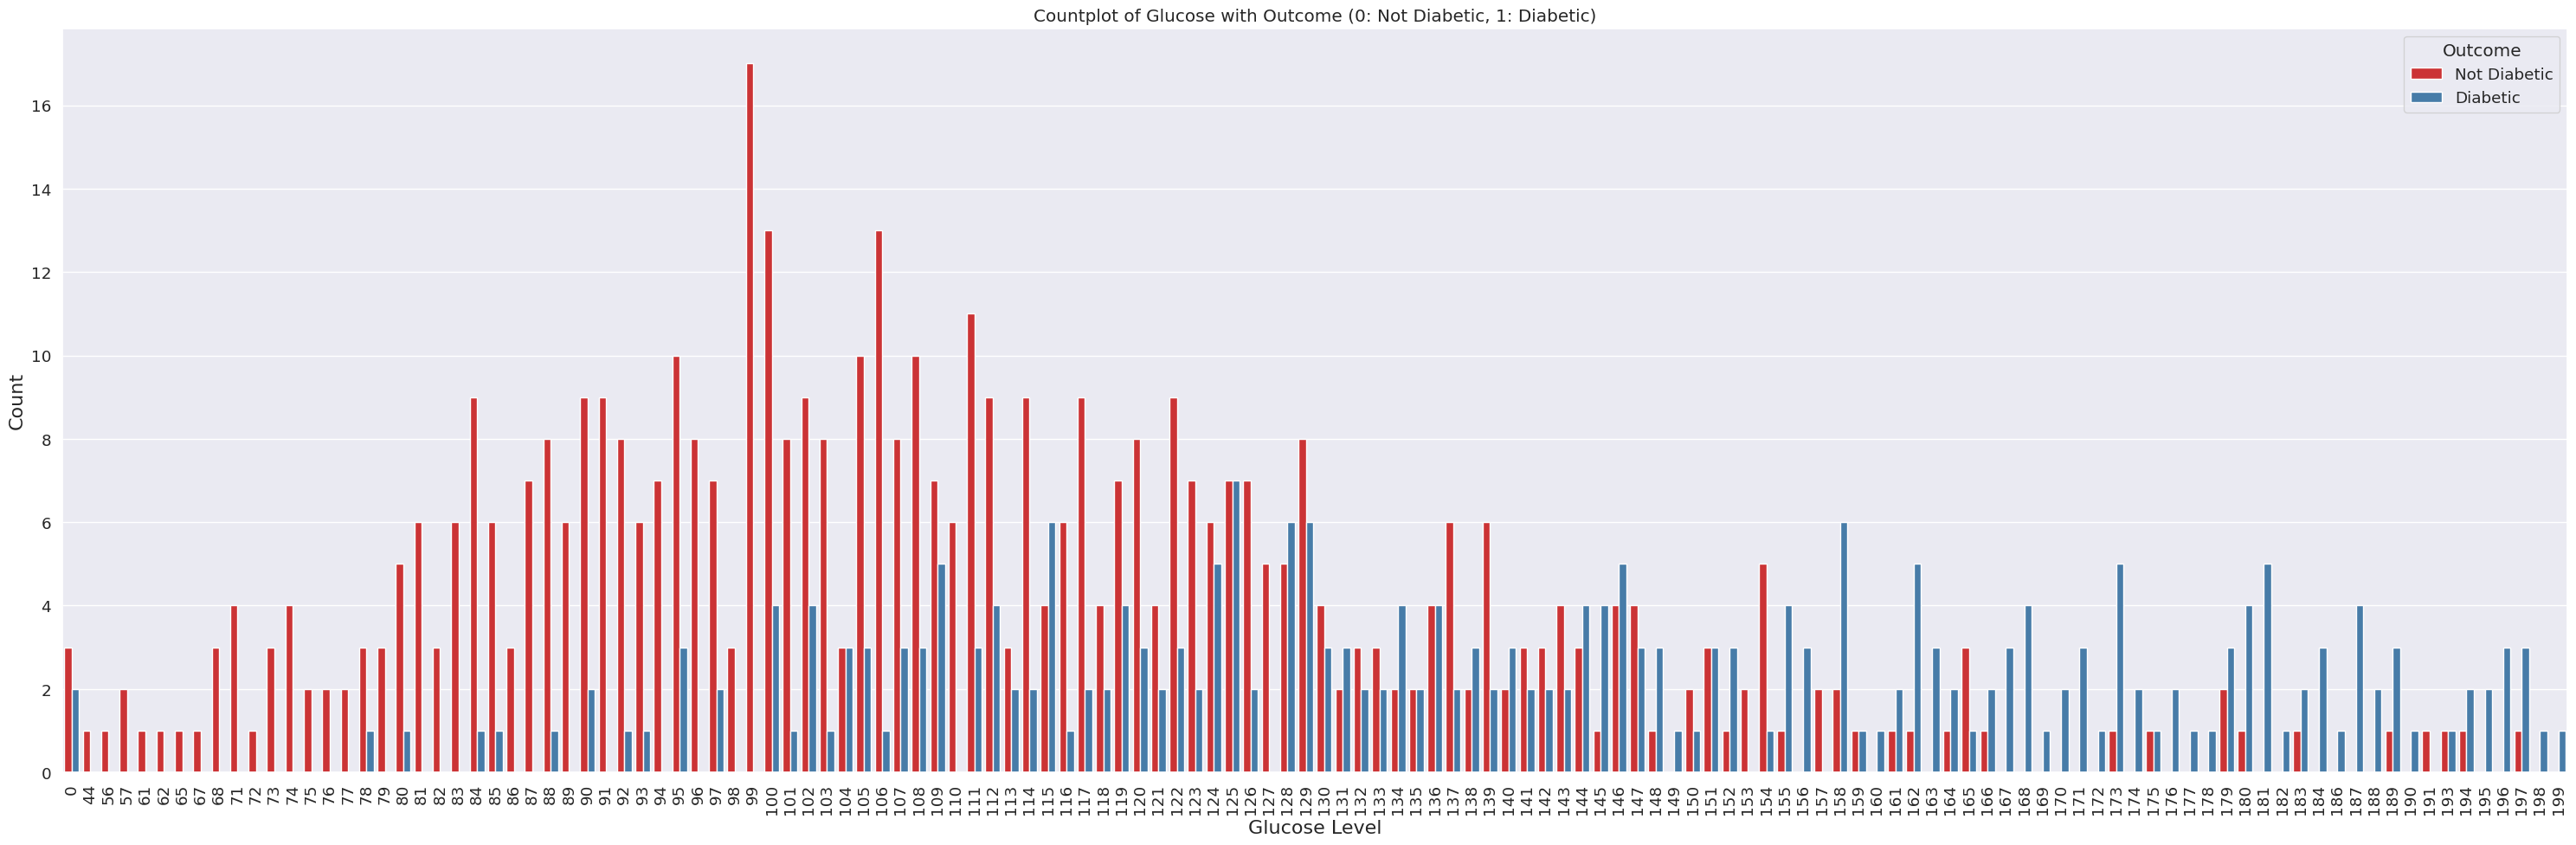

In [ ]:
plt.figure(figsize=(30, 10))
sns.countplot(data=diabetes_dataset, x='Glucose', hue='Outcome', palette='Set1')
plt.title('Countplot of Glucose with Outcome (0: Not Diabetic, 1: Diabetic)')
plt.xlabel('Glucose Level',fontsize=16)
plt.ylabel('Count',fontsize=16)
plt.legend(title='Outcome', labels=['Not Diabetic', 'Diabetic'])
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensure that labels fit within the plot area
plt.show()

# MACHINE LEARNING MODEL

In [ ]:
# separating the data and labels
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [ ]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [ ]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Data standardisation

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X)

StandardScaler()

In [ ]:
standardized_data = scaler.transform(X)

In [ ]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [ ]:
X = standardized_data
Y = diabetes_dataset['Outcome']

In [ ]:
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Train test slplit

In [ ]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y, test_size=0.2 , stratify=Y , random_state=2)

In [ ]:
print(X.shape , X_train.shape , X_test.shape)

(768, 8) (614, 8) (154, 8)


Training the label

In [ ]:
# Create a Gaussian Naive Bayes classifier
naive_bayes_classifier = GaussianNB()


In [ ]:
# Train the Naive Bayes classifier on the training data
naive_bayes_classifier.fit(X_train, Y_train)

GaussianNB()

In [ ]:
# Make predictions on the test data
Y_pred = naive_bayes_classifier.predict(X_test)

In [ ]:
# Get probability estimates for both training and test data
train_probabilities = naive_bayes_classifier.predict_proba(X_train)[:, 1]
test_probabilities = naive_bayes_classifier.predict_proba(X_test)[:, 1]


In [ ]:
# Threshold probabilities for predictions (e.g., 0.5)
train_predictions = np.where(train_probabilities >= 0.5, 1, 0)
test_predictions = np.where(test_probabilities >= 0.5, 1, 0)

Model Evaluation

In [ ]:
# Calculate accuracy score on the test data
test_data_accuracy = accuracy_score(Y_pred, Y_test)
print('Accuracy score of the test data: {:.2f}%'.format(test_data_accuracy * 100))

Accuracy score of the test data: 77.27%


In [ ]:
# Accuracy score on the training data
train_data_accuracy = accuracy_score(train_predictions, Y_train)
print('Accuracy score of the training data: {:.2f}%'.format(train_data_accuracy * 100))


Accuracy score of the training data: 75.57%


Making a predictive system

In [ ]:
# Input data for prediction
input_data = (5, 166, 72, 19, 175, 25.8, 0.587, 51)

# Convert the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Standardize the input data
std_data = scaler.transform(input_data_reshaped)

# Get the probability estimate for the input data
input_probability = naive_bayes_classifier.predict_proba(std_data)[:, 1]

# Make a prediction based on the probability threshold (e.g., 0.5)
input_prediction = 1 if input_probability >= 0.5 else 0

if input_prediction == 0:
    print('The person is not diabetic')
else:
    print('The person is diabetic')

# Print the probability estimate for the input data
print('Probability of being diabetic for the input data: {:.2f}%'.format(input_probability[0] * 100))








The person is diabetic
Probability of being diabetic for the input data: 67.42%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Deployment

Saving The Model

In [ ]:
import pickle

In [ ]:
filename = 'diabetes_model.sav'
pickle.dump(naive_bayes_classifier , open(filename,'wb'))

In [ ]:
#Loading the saved model
loaded_model = pickle.load(open('diabetes_model.sav' , 'rb'))